In [16]:
import node_class as nd
import random
import matplotlib.pyplot as plt

In [17]:
n2 = nd.Node(1,2,10,[1,2,3,4],[])

print(n2.get_position())

(1, 2)


In [18]:
grid = {}  # initialize a dictionary

for i in range(10):
    for j in range(10):
        rand_pos_x = i + random.randrange(0,3)
        rand_pos_y = j + random.randrange(0,3)
        node = nd.Node(rand_pos_x, rand_pos_y,0,[],[])
        grid[(i,j)] = node



In [19]:
print(grid[(3,4)].get_position())

(4, 6)


In [20]:
x = []
y = []

for i in range(10):
    for j in range(10):
        x_pos,y_pos = grid[(i,j)].get_position()
        x.append(x_pos)
        y.append(y_pos)

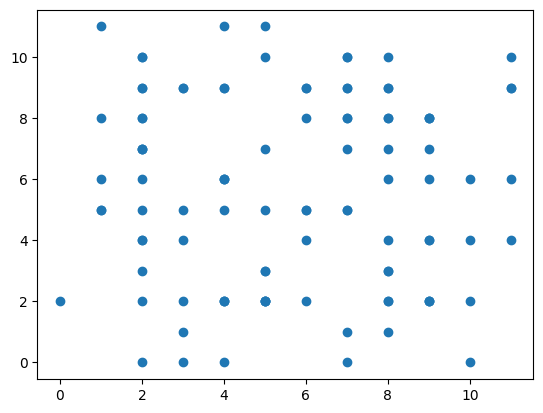

In [22]:
plt.scatter(x,y)
plt.show()